In [32]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [33]:
df = pd.read_csv(r'C:\Users\30272\Desktop\Machine_Learning\My_Notes\Linear regression models\Code_Jupyter\data\regress_data2.csv', header=0, names=['features_1', 'features_2','features_3'])
df.head() # 显示前5行数据

,features_1,features_2,features_3
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [ ]:
#数据归一化
df = (df - df.mean()) / df.std() #标准化数据
df.head() # 显示前5行数据

,features_1,features_2,features_3
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


In [35]:
# 添加一列全为1的列
df.insert(0, 'Ones', 1)
# 设置X（训练数据）和y（目标变量）
cols = df.shape[1]
X = df.iloc[:, 0:cols - 1]
y = df.iloc[:, cols - 1:cols]

In [36]:
df.head() # 显示前5行数据

,Ones,features_1,features_2,features_3
0,1,0.130010,-0.223675,0.475747
1,1,-0.504190,-0.223675,-0.084074
2,1,0.502476,-0.223675,0.228626
3,1,-0.735723,-1.537767,-0.867025
4,1,1.257476,1.090417,1.595389


In [37]:
X.head() # 显示前5行数据

,Ones,features_1,features_2
0,1,0.130010,-0.223675
1,1,-0.504190,-0.223675
2,1,0.502476,-0.223675
3,1,-0.735723,-1.537767
4,1,1.257476,1.090417


In [38]:
y.head() # 显示前5行数据

,features_3
0,0.475747
1,-0.084074
2,0.228626
3,-0.867025
4,1.595389


In [39]:
X = X.values # 转换为numpy数组
y = y.values # 转换为numpy数组

In [63]:
# -------------------- 多元线性回归的梯度下降实现 --------------------
learning_rate = 0.01 # 学习率
n_iterations = 1000 # 迭代次数
n_features = 2
#theta_gd = np.random.randn(n_features + 1, 1)  # 初始化参数
theta_gd = np.ones((n_features + 1, 1))  # 初始化参数
print(theta_gd, theta_gd.shape) # 查看参数的形状
n_samples = X.shape[0] # 样本数量
cast =[] # 用于存储每次迭代的损失函数值
# 梯度下降算法
for iteration in range(n_iterations):
    # 计算预测值
    y_pred = X.dot(theta_gd) # 预测值
    # 计算损失函数（均方误差）
    loss = (1/(2*n_samples)) * np.sum((y_pred - y.reshape(-1, 1))**2)
    cast.append(loss) # 存储损失函数值
    # 每100次迭代打印一次损失函数值
    if iteration % 100 == 0:
        print(f"Iteration {iteration}: Loss = {loss}")
    # 计算梯度
    gradients = (1/n_samples) * X.T.dot(X.dot(theta_gd) - y.reshape(-1, 1))
    theta_gd = theta_gd - learning_rate * gradients

[[1.]
 [1.]
 [1.]] (3, 1)
Iteration 0: Loss = 1.2464904413380709
Iteration 100: Loss = 0.2616480695207344
Iteration 200: Loss = 0.15762164360102646
Iteration 300: Loss = 0.13904869987923732
Iteration 400: Loss = 0.13384845739354012
Iteration 500: Loss = 0.13197297687572915
Iteration 600: Loss = 0.13122288351032713
Iteration 700: Loss = 0.13091190624846322
Iteration 800: Loss = 0.13078145568724678
Iteration 900: Loss = 0.1307265270359516


In [64]:
print("\n多元线性回归梯度下降结果:")
print(f"theta_0 (截距): {theta_gd[0][0]:.4f}")
print(f"theta_1 (特征1系数): {theta_gd[1][0]:.4f}")
print(f"theta_2 (特征2系数): {theta_gd[2][0]:.4f}")


多元线性回归梯度下降结果:
theta_0 (截距): 0.0000
theta_1 (特征1系数): 0.8785
theta_2 (特征2系数): -0.0469


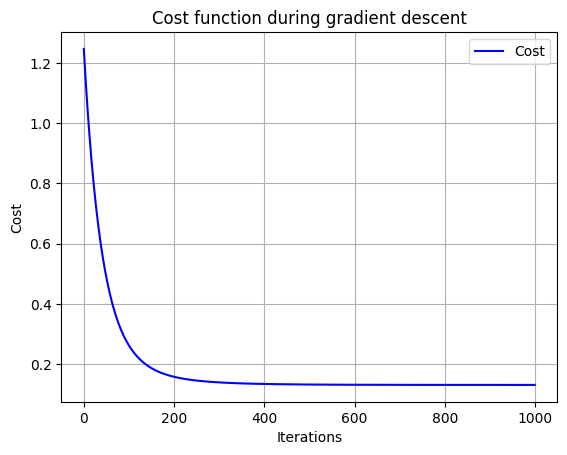

In [65]:
plt.plot(range(n_iterations), cast, color='blue',label='Cost')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost function during gradient descent')
plt.legend()
plt.grid()
plt.show()

In [66]:
#-------------------- 多元线性回归的正规方程实现 --------------------
theta_best = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y.reshape(-1, 1))

In [67]:
print("\n多元线性回归正规方程结果:")
print(f"theta_0 (截距): {theta_best[0][0]:.4f}")
print(f"theta_1 (特征1系数): {theta_best[1][0]:.4f}")
print(f"theta_2 (特征2系数): {theta_best[2][0]:.4f}")


多元线性回归正规方程结果:
theta_0 (截距): -0.0000
theta_1 (特征1系数): 0.8848
theta_2 (特征2系数): -0.0532
